<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width="400" align="center"></a>

<h1 align="center"><font size="6">Classification with Python</font></h1>

In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline
plt.style.use('ggplot')

In [2]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

# All requested packages already installed.



### About dataset

This dataset is about past loans. The __Loan_train.csv__ data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
|----------------|---------------------------------------------------------------------------------------|
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |

### Lets download the dataset

In [3]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

--2020-02-04 14:29:02--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

100%[======================================>] 23,101      --.-K/s   in 0.002s  

2020-02-04 14:29:02 (12.9 MB/s) - ‘loan_train.csv’ saved [23101/23101]



# Load Data From CSV File  

In [4]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [5]:
df.shape

(346, 10)

## Convert to date time object 

In [6]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and Pre-processing

In [7]:
# Let’s see how many of each class is in our data set 
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection 


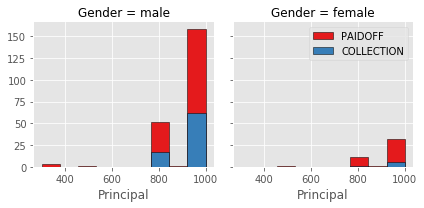

In [8]:
# Lets plot some columns to underestand data better:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

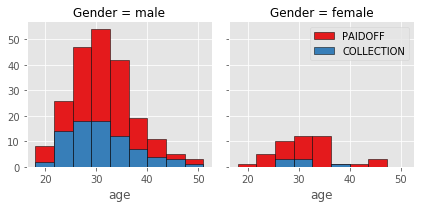

In [9]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

## Pre-processing:  Feature selection/extraction

### Lets look at the day of the week people get the loan 

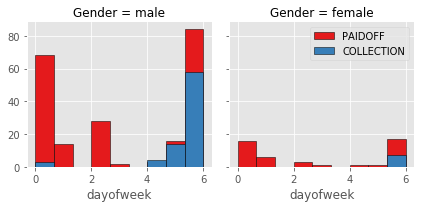

In [10]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()

We see that people who get the loan at the end of the week dont pay it off, so lets use Feature binarization to set a threshold values less then day 4 

In [11]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values

Lets look at gender:

In [12]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Lets convert male to 0 and female to 1:


In [13]:
df['Gender'].replace('female', 0, inplace=True)
df['Gender'].replace('male', 1, inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,1,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,0,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,1,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,0,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,1,4,1


## One Hot Encoding  
### How about education?

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

### Feature before One Hot Encoding

In [15]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,1,High School or Below
1,1000,30,33,0,Bechalor
2,1000,15,27,1,college
3,1000,30,28,0,college
4,1000,30,29,1,college


### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame 

In [16]:
Feature = df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,1,0,3,0,1,0
1,1000,30,33,0,0,3,1,0,0
2,1000,15,27,1,0,3,0,0,1
3,1000,30,28,0,1,4,0,0,1
4,1000,30,29,1,1,4,0,0,1


## Feature selection

#### Lets defind feature sets, X:

In [17]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,45,1,0,3,0,1,0
1,1000,30,33,0,0,3,1,0,0
2,1000,15,27,1,0,3,0,0,1
3,1000,30,28,0,1,4,0,0,1
4,1000,30,29,1,1,4,0,0,1


#### What are our lables?

In [18]:
Y= df['loan_status']
Y.replace('PAIDOFF', 0, inplace=True)
Y.replace('COLLECTION', 1, inplace=True)

## Normalize Data 

Data Standardization give data zero mean and unit variance (technically should be done after train test split )

In [19]:
X = preprocessing.StandardScaler().fit(X).transform(X)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


# Classification 

- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression

In [20]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [21]:
# a dictionary for keeping all scores of the classifiers
trainScores={}

## K Nearest Neighbor(KNN)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

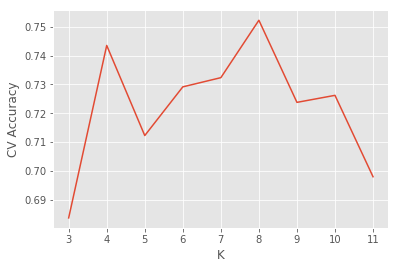

Best K is : 8
Cross validation Accuracy : 0.7522689075630252


In [23]:
# Find the best K
bestScore=0.0
accList=[]

for k in range(3,12):
    
    clf_knn = KNeighborsClassifier(n_neighbors=k,algorithm='auto')

    scores = cross_val_score(clf_knn, X, Y, cv=10)
    score=scores.mean()
    accList.append(score)
    
    if score > bestScore:
        bestScore=score
        best_clf=clf_knn
        bestK=k
        

plt.plot(range(3,12),accList)
plt.xlabel('K')
plt.ylabel('CV Accuracy')
plt.show()
        
print("Best K is :",bestK)
print("Cross validation Accuracy :",bestScore)
clf_knn=best_clf

In [24]:
KNN_model = clf_knn.fit(X, Y)

In [25]:
# Keep track the train score
y_pred = KNN_model.predict(X)
trainScores['KNN-jaccard'] = jaccard_similarity_score(Y, y_pred)
trainScores['KNN-f1-score'] = f1_score(Y, y_pred, average='weighted')
trainScores

{'KNN-jaccard': 0.7947976878612717, 'KNN-f1-score': 0.7701843558681992}

## Decision Tree

In [26]:
from sklearn import tree

In [27]:
DT_model = tree.DecisionTreeClassifier(criterion="entropy", max_depth = 8).fit(X, Y)

In [28]:
# Keep track the train score
y_pred = DT_model.predict(X)
trainScores['DT-jaccard'] = jaccard_similarity_score(Y, y_pred)
trainScores['DT-f1-score'] = f1_score(Y, y_pred, average='weighted')
trainScores

{'KNN-jaccard': 0.7947976878612717,
 'KNN-f1-score': 0.7701843558681992,
 'DT-jaccard': 0.8121387283236994,
 'DT-f1-score': 0.8004728751552592}

### Visualizng the tree

In [29]:
import graphviz 
import pydotplus

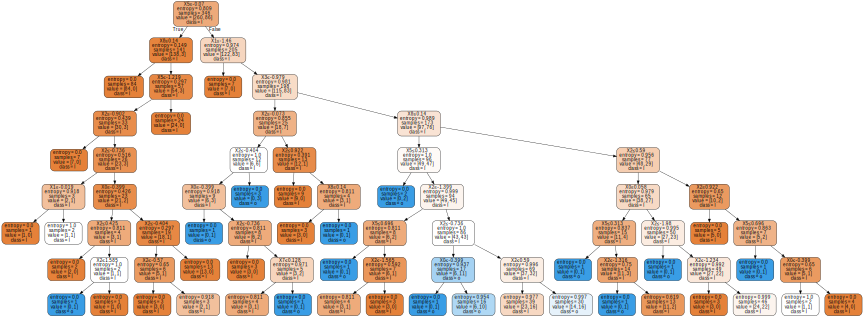

In [30]:
dot_data = tree.export_graphviz(DT_model, out_file=None, class_names='loan_status', filled=True, rounded=True, special_characters=True) 

graph = pydotplus.graph_from_dot_data(dot_data)
graph.set_size('"12,12!"')
gvz_graph = graphviz.Source(graph.to_string())

gvz_graph

## Support Vector Machine

In [31]:
from sklearn import svm

In [32]:
SVM_model = svm.SVC(kernel='rbf').fit(X, Y) 

In [33]:
# Keep track the train score
y_pred = SVM_model.predict(X)
trainScores['SVM-jaccard'] = jaccard_similarity_score(Y, y_pred)
trainScores['SVM-f1-score'] = f1_score(Y, y_pred, average='weighted')
trainScores

{'KNN-jaccard': 0.7947976878612717,
 'KNN-f1-score': 0.7701843558681992,
 'DT-jaccard': 0.8121387283236994,
 'DT-f1-score': 0.8004728751552592,
 'SVM-jaccard': 0.7687861271676301,
 'SVM-f1-score': 0.683672614559772}

## Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

In [35]:
LR_model = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial').fit(X,Y)

In [36]:
# Keep track the train score
y_pred = LR_model.predict(X)
y_proba = LR_model.predict_proba(X)
trainScores['LR-jaccard'] = jaccard_similarity_score(Y, y_pred)
trainScores['LR-f1-score'] = f1_score(Y, y_pred, average='weighted')
trainScores['LR-logLoss'] = log_loss(Y, y_proba)
trainScores

{'KNN-jaccard': 0.7947976878612717,
 'KNN-f1-score': 0.7701843558681992,
 'DT-jaccard': 0.8121387283236994,
 'DT-f1-score': 0.8004728751552592,
 'SVM-jaccard': 0.7687861271676301,
 'SVM-f1-score': 0.683672614559772,
 'LR-jaccard': 0.7630057803468208,
 'LR-f1-score': 0.7088399037150602,
 'LR-logLoss': 0.43174993676801543}

# Model Evaluation using Test set

First, download and load the test set:

In [37]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2020-02-04 14:29:12--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

100%[======================================>] 3,642       --.-K/s   in 0s      

2020-02-04 14:29:12 (170 MB/s) - ‘loan_test.csv’ saved [3642/3642]



## Load Test set for evaluation 

In [38]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


## Pre processing

In [39]:
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

test_df['Gender'].replace('female', 0, inplace=True)
test_df['Gender'].replace('male', 1, inplace=True)

Feature_test = test_df[['Principal','terms','age','Gender','weekend','dayofweek']]
Feature_test = pd.concat([Feature_test,pd.get_dummies(test_df['education'])], axis=1)
Feature_test.drop(['Master or Above'], axis = 1,inplace=True)
Feature_test.head()

,Principal,terms,age,Gender,weekend,dayofweek,Bechalor,High School or Below,college
0,1000,30,50,0,0,3,1,0,0
1,300,7,35,1,1,4,0,0,0
2,1000,30,43,0,1,5,0,1,0
3,1000,30,26,1,1,5,0,0,1
4,800,15,29,1,1,6,1,0,0


In [40]:
# Split to X_test and Y_test
X_test = Feature_test

Y_test = test_df['loan_status']
Y_test.replace('PAIDOFF', 0, inplace=True)
Y_test.replace('COLLECTION', 1, inplace=True)

X_test = preprocessing.StandardScaler().fit(X_test).transform(X_test)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:8: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.


## Predict 

In [41]:
testScores={}

y_pred = KNN_model.predict(X_test)
testScores['KNN-jaccard'] = jaccard_similarity_score(Y_test, y_pred)
testScores['KNN-f1-score'] = f1_score(Y_test, y_pred, average='weighted')
testScores['KNN-logLoss'] = 'N/A'

y_pred = DT_model.predict(X_test)
testScores['DT-jaccard'] = jaccard_similarity_score(Y_test, y_pred)
testScores['DT-f1-score'] = f1_score(Y_test, y_pred, average='weighted')
testScores['DT-logLoss'] = 'N/A'

y_pred = SVM_model.predict(X_test)
testScores['SVM-jaccard'] = jaccard_similarity_score(Y_test, y_pred)
testScores['SVM-f1-score'] = f1_score(Y_test, y_pred, average='weighted')
testScores['SVM-logLoss'] = 'N/A'

y_pred = LR_model.predict(X_test)
y_proba = LR_model.predict_proba(X_test)
testScores['LR-jaccard'] = jaccard_similarity_score(Y_test, y_pred)
testScores['LR-f1-score'] = f1_score(Y_test, y_pred, average='weighted')
testScores['LR-logLoss'] = log_loss(Y_test, y_proba)

In [43]:
# Show the Result
testScores

{'KNN-jaccard': 0.7407407407407407,
 'KNN-f1-score': 0.7144311330357843,
 'KNN-logLoss': 'N/A',
 'DT-jaccard': 0.8148148148148148,
 'DT-f1-score': 0.8099506636092001,
 'DT-logLoss': 'N/A',
 'SVM-jaccard': 0.7222222222222222,
 'SVM-f1-score': 0.6212664277180406,
 'SVM-logLoss': 'N/A',
 'LR-jaccard': 0.7777777777777778,
 'LR-f1-score': 0.708937198067633,
 'LR-logLoss': 0.47395785210731034}

# Report

| Algorithm          | Jaccard | F1-score | LogLoss |
|--------------------|---------|----------|---------|
| KNN                | 0.7407       | 0.7144        | N/A      |
| Decision Tree      | 0.8148       | 0.8100        | N/A      |
| SVM                | 0.7222       | 0.6213        | N/A      |
| Logistic Regression | 0.7778       | 0.7089        | 0.4740      |

#### Based on this result, we can see that the Decision Tree model has the best performance(I limit the depth of the tree to avoid the over fitting). Although the Logistic Regression does not perform well in train accuracy, it does show a great potential in the test set.